In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.optimize import curve_fit

c:\users\professional\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [56]:
gp_table = pd.read_table('./results_by_08.05.2019/crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')

In [60]:
dataset_pulse = pd.DataFrame(columns=[
    'line_k', 
    'line_b', 
    'power_a',
    'power_b',
    'power_k',
    'w_10',
    'w_50',
    'type',
])

In [61]:
def power_func(x, a, b, k): 
    return [a**float(i - b) - k for i in x]

def linea_func(x, k, b):
    return k*x + b

In [63]:
for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
        
    profile = profile/np.max(profile)
    
    y = profile
    x = range(len(profile))
    
    try:
        threshold = 10 
        a = 1
        b = 1 
        k = 1 
        popt_power_1, pcov = curve_fit(linea_func,x[:threshold +1],y[:threshold+1],p0=[b, k], maxfev=20000) 
        popt_power_2, pcov = curve_fit(power_func,x[threshold:],y[threshold:],p0=[a, b, k])
        
        if gp_table['Type'][idx] == 'Pulse':
            type_pulse = 1
        else:
            type_pulse = 0

        dataset_pulse.loc[idx] = [
            popt_power_1[0],
            popt_power_1[1],
            popt_power_2[0],
            popt_power_2[1],
            popt_power_2[2],
            gp_table['W10, point'][idx],
            gp_table['W50, point'][idx],
            int(type_pulse)
        ]

    except RuntimeError:
        dataset_pulse.loc[idx] = [
            -0.00154274,
            0.76656816,
            0,
            0,
            0,
            100,
            100,
            int(type_pulse)
        ]

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [64]:
dataset_pulse

,line_k,line_b,power_a,power_b,power_k,w_10,w_50,type
0,0.121614,-0.277769,0.951802,9.282250,-0.096431,54.61335,19.32975,1.0
1,0.117197,-0.187393,0.960589,5.053614,-0.099118,63.82035,19.41885,1.0
2,0.114579,-0.269827,0.946091,8.906292,-0.076434,39.25350,18.77040,1.0
3,0.119857,-0.304079,0.951695,8.123937,-0.102338,59.65245,21.39390,1.0
4,0.103468,-0.194400,0.945931,7.407880,-0.100924,41.72355,12.60765,1.0
...,...,...,...,...,...,...,...,...
2618,0.060159,-0.093049,0.915218,7.102118,0.037088,11.27610,4.97475,1.0
2619,0.050407,-0.044589,0.767636,8.933279,-0.057258,9.80595,1.70775,0.0
2620,0.130100,-0.335203,0.908805,7.738985,0.028621,14.60745,7.01415,1.0
2621,0.090726,-0.326235,0.916727,9.533163,0.072201,9.79110,6.22215,1.0


In [65]:
corr = dataset_pulse.corr()
corr.style.background_gradient(cmap='coolwarm')

,line_k,line_b,power_a,power_b,power_k,w_10,w_50,type
line_k,1,-0.919409,0.469061,-0.0118225,-0.071339,-0.204801,-0.466899,0.674155
line_b,-0.919409,1,-0.45034,0.00596128,0.0733817,0.241703,0.485416,-0.680777
power_a,0.469061,-0.45034,1,0.0121771,0.0314104,-0.204997,-0.517964,0.371802
power_b,-0.0118225,0.00596128,0.0121771,1,0.25517,-0.00860919,-0.00398223,-0.00544422
power_k,-0.071339,0.0733817,0.0314104,0.25517,1,-0.0636544,0.00817445,-0.0999665
w_10,-0.204801,0.241703,-0.204997,-0.00860919,-0.0636544,1,0.782613,-0.0609844
w_50,-0.466899,0.485416,-0.517964,-0.00398223,0.00817445,0.782613,1,-0.292266
type,0.674155,-0.680777,0.371802,-0.00544422,-0.0999665,-0.0609844,-0.292266,1


In [66]:
X = dataset_pulse.drop(['type'], axis=1)
y = dataset_pulse['type']

In [47]:
# drop unusless column
X = X.drop(['power_b', 'power_k'], axis=1)

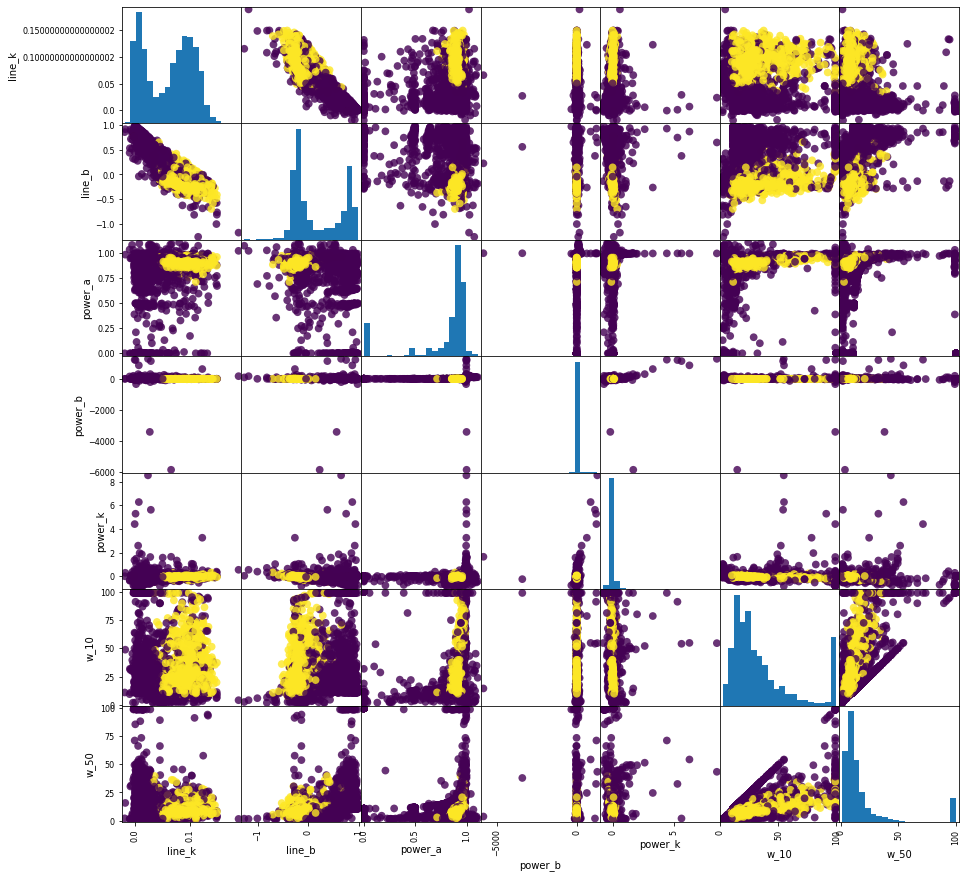

In [67]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
print(f'len X_train = {len(X_train)}, len y_train = {len(y_train)}',
      f'len X_test = {len(X_test)}, len y_test = {len(y_test)}', sep='\n') 

len X_train = 1836, len y_train = 1836
len X_test = 787, len y_test = 787


In [70]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.8526048284625158


In [71]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.8348157560355781


In [72]:
data_pulse = dataset_pulse.where(dataset_pulse.type==1, axis=1).dropna()
data_noise = dataset_pulse.where(dataset_pulse.type==0, axis=1).dropna()

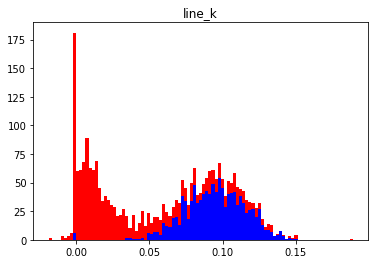

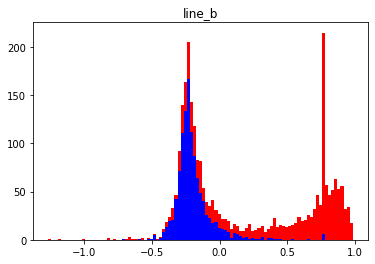

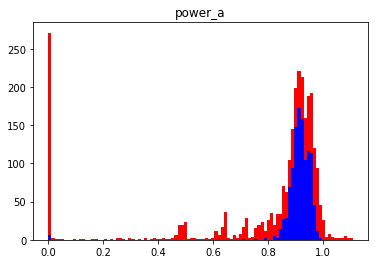

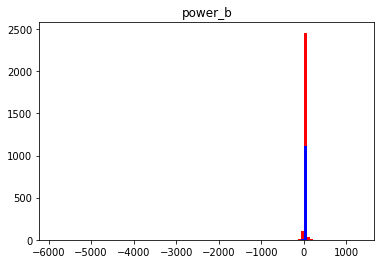

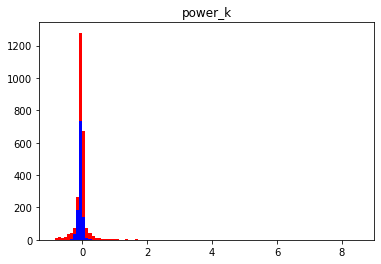

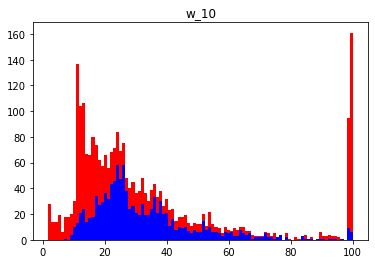

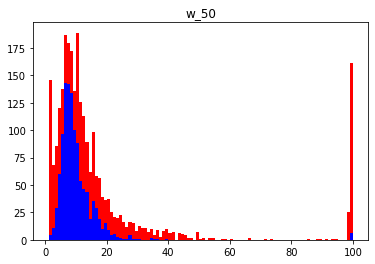

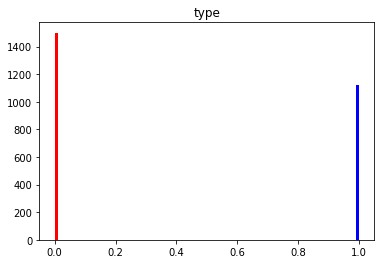

In [73]:
for lbl in data_pulse.columns:
    bins = np.linspace(min(dataset_pulse[lbl]), max(dataset_pulse[lbl]), 100)
    plt.close()
    plt.title(lbl)
    plt.hist([data_pulse[lbl ], data_noise[lbl]],
             bins=bins, stacked=True, color=['b', 'r'])
    plt.show()